# data analysis
# data analysis
# data analysis
# data analysis
# data analysis

youtube_project_0915_10am.db

regional features are only extracted for channel - "UCFSb_tOQQJtBJsOiakWqhgQ", index - 331 (done) and before

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sqlite3

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read sqlite3 data into pandas
conn = sqlite3.connect('youtube_project_regional_all.db') # connection
df = pd.read_sql_query("SELECT * from videos_makeup", conn)
conn.close

<function Connection.close>

In [3]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 500

In [110]:
df.dtypes

channel_id              object
subscriptions_count      int64
videos_count             int64
video_id                object
video_views              int64
video_title             object
video_date              object
hue                    float64
saturation             float64
brightness_global      float64
dynamic_range          float64
contrast_Mic           float64
contrast_RMS           float64
len_title                int64
ratio_bc_fr            float64
bri_fr_mean            float64
bri_bc_mean            float64
bri_diff_mean          float64
contrast_bc            float64
contrast_fr            float64
contrast_diff          float64
sat_bc                 float64
title_cluster_label      int64
date_approx              int64
pop_in_channel           int64
dtype: object

In [69]:
df.tail(n=3)

,channel_id,subscriptions_count,videos_count,video_id,video_views,video_title,video_date,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc,title_cluster_label,date_approx
265256,UCf2d6CwirBQDt2ep5VO8hDQ,1931,537,srCXQZp8q3w,40,Archie's girls by mac haul and review,3 years ago,0.088689,0.597887,0.340172,1.0,1.0,0.319734,37,0.622992,0.469935,0.131882,0.338054,0.279428,0.270940,-0.008488,0.165873,2,1095
265257,UCf2d6CwirBQDt2ep5VO8hDQ,1931,537,z_uqM_UbN8A,36,Mini drugstore haul,3 years ago,0.087056,0.664944,0.474150,1.0,1.0,0.373642,19,1.205882,0.715664,0.273870,0.441793,0.337396,0.252957,-0.084439,0.459505,2,1095
265258,UCf2d6CwirBQDt2ep5VO8hDQ,1931,537,VxD8EupOkqo,104,Flower makeup at walmart,3 years ago,0.082435,0.448975,0.448496,1.0,1.0,0.403845,24,0.603340,0.702056,0.028237,0.673819,0.131932,0.283082,0.151150,0.138443,1,1095


## Plot distribution of 
### For videos distribution:
1. views vs. video (√)
2. views/subscription vs. video (√)

### For channel distribution:
1. channel subscriptions vs. channel (√)
2. total videos vs. channel (√)
3. mean of (views/videos) vs. channel
4. mean of (views/videos/subscriptions) vs. channel


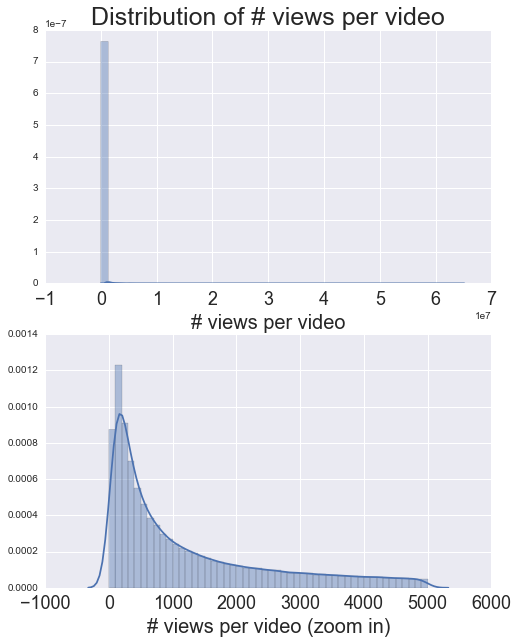

In [9]:
####################################
# plot number of views for each video

y_views_of_video = df['video_views'].tolist()
y_views_of_video_zoom = [x for x in y_views_of_video if x < 5000]

fig = plt.figure(figsize=(8,10))

plt.subplot(2, 1, 1)
sns.distplot(y_views_of_video)
plt.xlabel('# views per video', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Distribution of # views per video', fontsize=25)
#plt.savefig('distribution_views_per_video.pdf')

plt.subplot(2, 1, 2)
sns.distplot(y_views_of_video_zoom)
plt.xlabel('# views per video (zoom in)', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)

#plt.subplots_adjust(bottom=0.2, right=1.5, top=0.99, hspace=0.5)
fig.savefig('distribution_views_per_video.pdf')

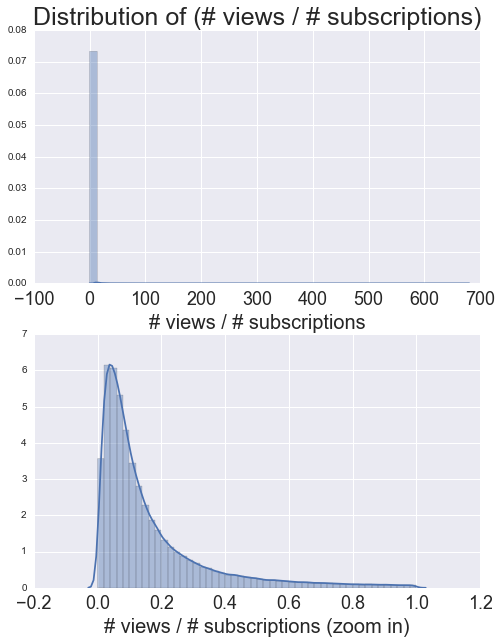

In [10]:
####################################
# plot views/subscriptions for each video

y_subscriptions = df['subscriptions_count'].tolist()
y_videws_div_subs = [x / y for x,y in zip(y_views_of_video, y_subscriptions)]

y_videws_div_subs_zoom = [x for x in y_videws_div_subs if x < 1]

fig = plt.figure(figsize=(8,10))

plt.subplot(2, 1, 1)
sns.distplot(y_videws_div_subs)
plt.xlabel('# views / # subscriptions', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Distribution of (# views / # subscriptions)', fontsize=25)

plt.subplot(2, 1, 2)
sns.distplot(y_videws_div_subs_zoom)
plt.xlabel('# views / # subscriptions (zoom in)', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)

#plt.subplots_adjust(bottom=0.2, right=1.5, top=0.99, hspace=0.5)
fig.savefig('distribution_views_div_subs_per_video.pdf')

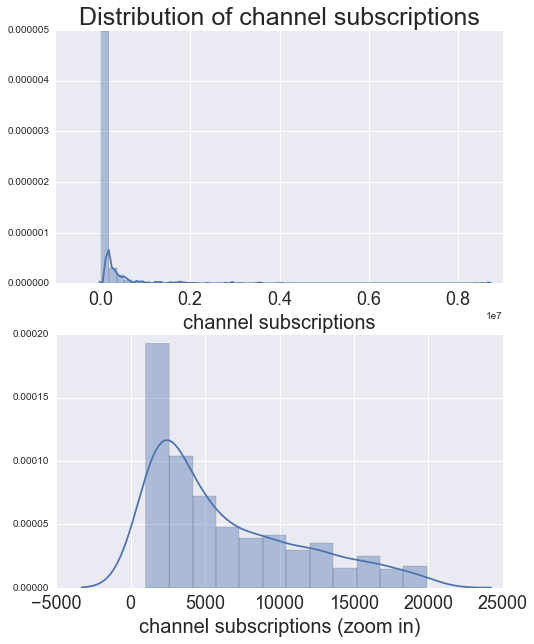

In [11]:
####################################
# plot channel subscriptions 
y_subscriptions_set = list(set(y_subscriptions)) # remove all duplicates

y_subscriptions_set_zoom = [x for x in y_subscriptions_set if x < 20000]

fig = plt.figure(figsize=(8,10))

plt.subplot(2, 1, 1)
sns.distplot(y_subscriptions_set)
plt.xlabel('channel subscriptions', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Distribution of channel subscriptions', fontsize=25)

plt.subplot(2, 1, 2)
sns.distplot(y_subscriptions_set_zoom)
plt.xlabel('channel subscriptions (zoom in)', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)

#plt.subplots_adjust(bottom=0.2, right=1.5, top=0.99, hspace=0.5)
fig.savefig('distribution_channel_subscriptions.pdf')

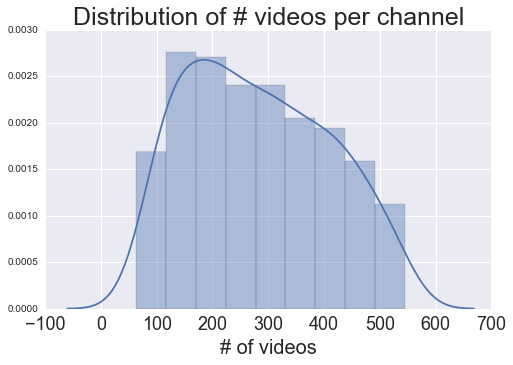

In [12]:
####################################
# plot (number of videos) per channel
y_videos_count = df['videos_count'].tolist()
y_videos_count_set = list(set(y_videos_count)) # remove all duplicates

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_count_set)
plt.xlabel('# of videos', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of # videos per channel', fontsize=25)
fig.savefig('distribution_videos_count.pdf')

In [23]:
df.head(2)

,channel_id,subscriptions_count,videos_count,video_id,video_views,video_title,video_date,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc
0,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,39aKSTw1HfY,37755,Glitter Eye Makeup Look - Isabella Fiori,11 hours ago,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281
1,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,7MzCD3hScOY,166407,DRUGSTORE BACK TO SCHOOL MAKEUP TUTORIAL,3 days ago,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836


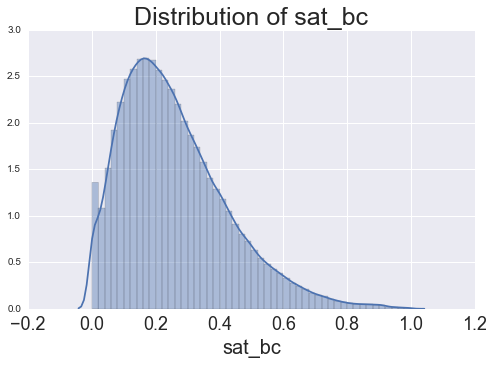

In [27]:
####################################
# plot (number of videos) per channel
y_videos_sat_bc = df['sat_bc'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_sat_bc)
plt.xlabel('sat_bc', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of sat_bc', fontsize=25)

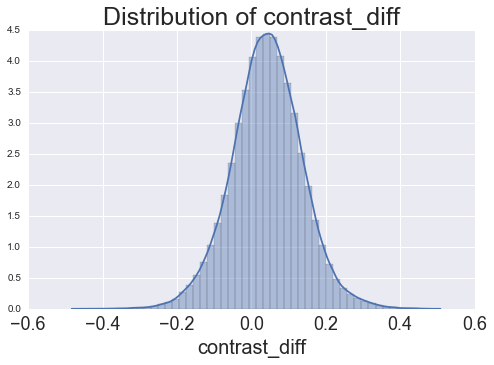

In [26]:
####################################
# plot (number of videos) per channel
y_videos_contrast_diff = df['contrast_diff'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_contrast_diff)
plt.xlabel('contrast_diff', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of contrast_diff', fontsize=25)

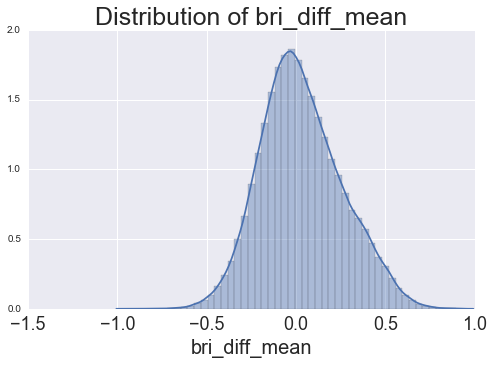

In [25]:
####################################
# plot (number of videos) per channel
y_videos_bri_diff_mean = df['bri_diff_mean'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_bri_diff_mean)
plt.xlabel('bri_diff_mean', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of bri_diff_mean', fontsize=25)

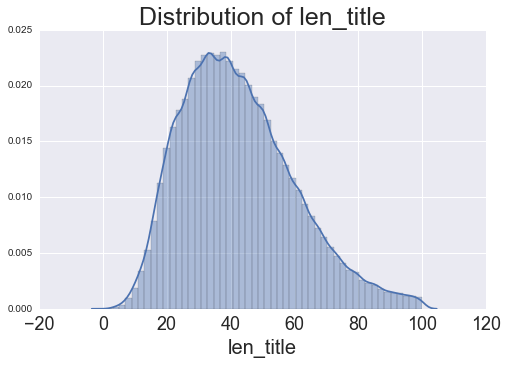

In [17]:
####################################
# plot (number of videos) per channel
y_videos_len_title = df['len_title'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_len_title)
plt.xlabel('len_title', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of len_title', fontsize=25)

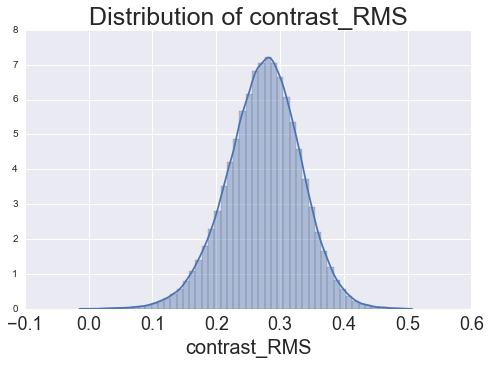

In [16]:
####################################
# plot (number of videos) per channel
y_videos_contrast_RMS = df['contrast_RMS'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_contrast_RMS)
plt.xlabel('contrast_RMS', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of contrast_RMS', fontsize=25)

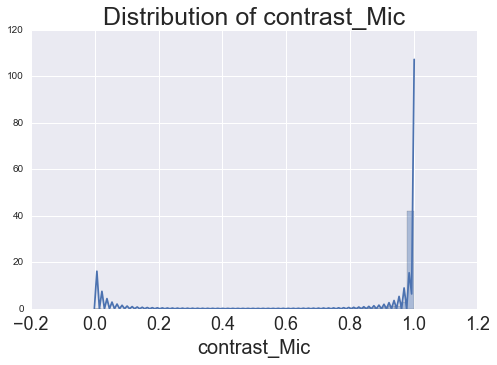

In [15]:
####################################
# plot (number of videos) per channel
y_videos_contrast_Mic = df['contrast_Mic'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_contrast_Mic)
plt.xlabel('contrast_Mic', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of contrast_Mic', fontsize=25)

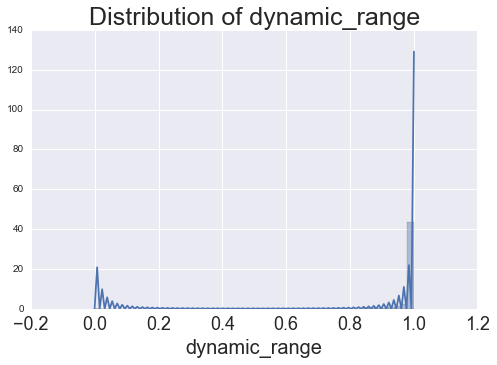

In [14]:
####################################
# plot (number of videos) per channel
y_videos_dyn = df['dynamic_range'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_dyn)
plt.xlabel('dynamic_range', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of dynamic_range', fontsize=25)

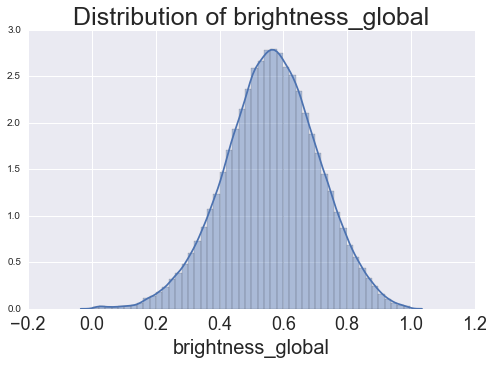

In [13]:
####################################
# plot (number of videos) per channel
y_videos_bri = df['brightness_global'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_bri)
plt.xlabel('brightness_global', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of brightness_global', fontsize=25)

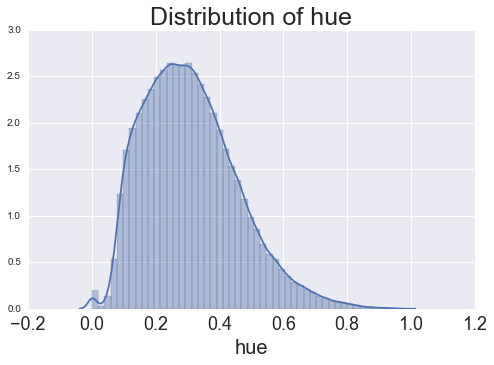

In [10]:
####################################
# plot (number of videos) per channel
y_videos_hue = df['hue'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_hue)
plt.xlabel('hue', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of hue', fontsize=25)
#fig.savefig('distribution_videos_count.pdf')

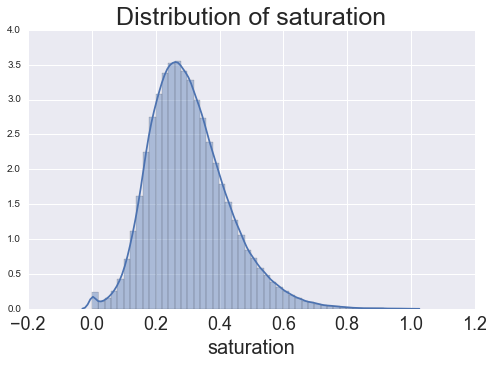

In [12]:
####################################
# plot (number of videos) per channel
y_videos_saturation = df['saturation'].tolist()

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_saturation)
plt.xlabel('saturation', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of saturation', fontsize=25)
#fig.savefig('distribution_videos_count.pdf')

In [26]:
# connect to sqlite3
conn = sqlite3.connect('youtube_project_0915_10am.db') # connection
c = conn.cursor() # cursor
c_1 = conn.cursor()
c_2 = conn.cursor()
c_3 = conn.cursor()
c_4 = conn.cursor()

In [73]:
conn.close

<function Connection.close>

In [15]:
# get the list of all channels, ordered by their id
channel_scraped = []  # save all the channel id got selected 
for row in c.execute('SELECT DISTINCT channel_id FROM videos_makeup ORDER BY channel_id'):
    channel_scraped.append(row[0])
len(channel_scraped)

1281

In [27]:
# compute summary informtion of each channel:
# channel subscriptions, total videos, total views, average views, average views/subs
channel_summary = [] 
for channel in channel_scraped:
    # find the total number of videos
    print("Channel index is {0}".format(channel_scraped.index(channel)))
    for row in c_1.execute("SELECT COUNT(*) FROM videos_makeup WHERE channel_id = '{0}'".format(channel)):
        videos_count = row[0]
        print ("Channel - {0} has {1} videos".format(channel, videos_count))
    # find the total views of a channel, and its subscriptions
    views_total = 0
    for row in c_2.execute("SELECT * FROM videos_makeup WHERE channel_id = '{0}'".format(channel)):
        views_total = views_total + row[4]
        channel_subs = row[1]
    #print("This channel has in total {0} views".format(views_total))
    # compute mean of views
    average_views = views_total / videos_count
    #print("Each video of this channel has on average {0} views.".format(average_views))
    # compute mean of views / subscriptions
    average_views_div_subs = average_views / channel_subs
    #print("Each video of this channel has on average {0} views/subscriptions.".format(average_views_div_subs))
    channel_summary.append([channel_subs, videos_count, views_total, average_views, average_views_div_subs])
    

Channel index is 0
Channel - UCaezsZGhwWgB4ZRmHNCfIyw has 98 videos
Channel index is 1
Channel - UC2v8a2K3PtXfmlcpseWkzew has 99 videos
Channel index is 2
Channel - UCkDc40NlwHtmq8udJKYMuMA has 101 videos
Channel index is 3
Channel - UCXMO7JjiR6NXc2YC95wAH9Q has 98 videos
Channel index is 4
Channel - UCEWatJSQffXadyNAExPaOvw has 100 videos
Channel index is 5
Channel - UCXFtdw-ICkVzvZeBJSiiYoA has 100 videos
Channel index is 6
Channel - UC6K4R3UtPSrTQBQPV_I6xJQ has 95 videos
Channel index is 7
Channel - UCW13GdAD2VzHooCuc8Kjq8A has 97 videos
Channel index is 8
Channel - UCmPY1lZrQ-xyiREad99ZQXw has 92 videos
Channel index is 9
Channel - UCOedsFQ4mpPy4zTx9-cKugw has 103 videos
Channel index is 10
Channel - UC4frXM4Hg1RE_ZOSm5EDxCg has 101 videos
Channel index is 11
Channel - UC6-wCxc9nHUEB9srfgUslNg has 97 videos
Channel index is 12
Channel - UCvuLf7pBtKfXDl7iJzICESA has 96 videos
Channel index is 13
Channel - UCAofiyb-_IIxQwLFihCQzgA has 99 videos
Channel index is 14
Channel - UCQ4qjLyb

In [17]:
print(channel_summary[0])

[2587, 216, 253516, 1173.6851851851852, 0.45368580795716473]


In [34]:
channel_summary[401]

[4103, 136, 20582, 151.33823529411765, 0.03688477584550759]

In [35]:
channel_summary[443]

[11720, 160, 18952214, 118451.3375, 10.106769411262798]

In [29]:
channel_average_views_per_video_div_subs = [x[4] for x in channel_summary]

In [37]:
min(channel_average_views_per_video_div_subs)

0.03688477584550759

In [32]:
channel_average_views_per_video_div_subs.index(min(channel_average_views_per_video_div_subs))

401

In [33]:
channel_average_views_per_video_div_subs.index(max(channel_average_views_per_video_div_subs))

443

(array([ -4000.,  -2000.,      0.,   2000.,   4000.,   6000.,   8000.,
         10000.,  12000.,  14000.]), <a list of 10 Text xticklabel objects>)

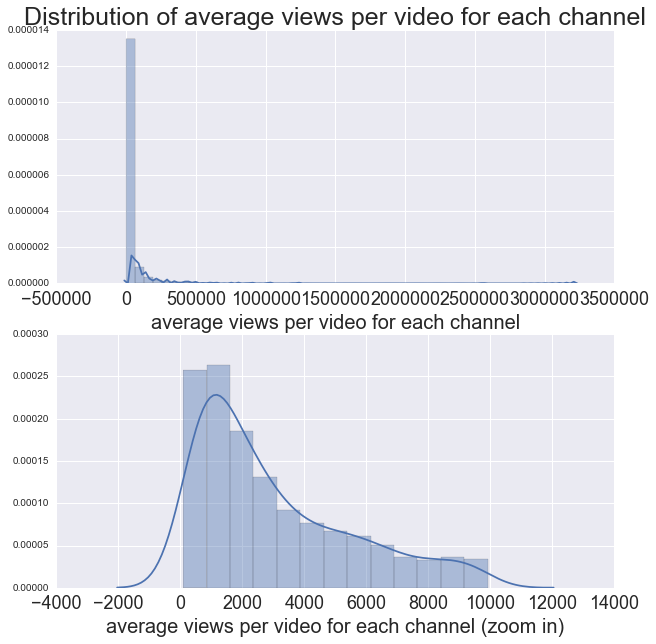

In [28]:
###############################################
# the average views per video for each channel 
channel_average_views_per_video = [x[3] for x in channel_summary]
channel_average_views_per_video_zoom = [x for x in channel_average_views_per_video if x < 10000]

fig = plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
sns.distplot(channel_average_views_per_video)
plt.xlabel('average views per video for each channel', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Distribution of average views per video for each channel', fontsize=25)

plt.subplot(2, 1, 2)
sns.distplot(channel_average_views_per_video_zoom)
plt.xlabel('average views per video for each channel (zoom in)', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)

#plt.subplots_adjust(bottom=0.2, right=1.5, top=0.99, hspace=0.5)
#fig.savefig('distribution_average_views_per_video.pdf')

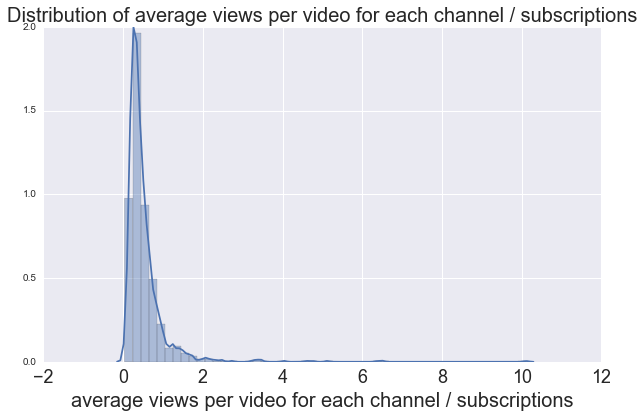

In [19]:
###############################################
# the average views per video for each channel / subscription
channel_average_views_per_video_div_subs = [x[4] for x in channel_summary]
#channel_average_views_per_video_div_subs_zoom = [x for x in channel_average_views_per_video_div_subs if x < 10000]

fig = plt.figure(figsize=(10,6))

sns.distplot(channel_average_views_per_video_div_subs)
plt.xlabel('average views per video for each channel / subscriptions', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Distribution of average views per video for each channel / subscriptions', fontsize=20)

#plt.subplots_adjust(bottom=0.2, right=1.5, top=0.99, hspace=0.5)
fig.savefig('distribution_average_views_per_video_div_subs.pdf')

## Plot some relations
### 1. average views per video vs. subscriptions

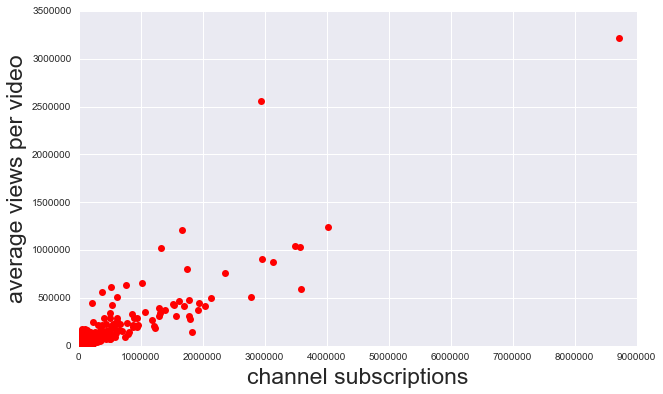

In [21]:
################################################
# plot average views per video vs. subscriptions
channel_subscriptions = [x[0] for x in channel_summary]
fig = plt.figure(figsize=(10,6))
plt.plot(channel_subscriptions, channel_average_views_per_video, 'ro')
plt.xlabel('channel subscriptions', fontsize=23)
plt.ylabel('average views per video', fontsize=23)
#plt.xticks(fontsize=18)
fig.savefig('relation_average_views_vs_subs.pdf')

## Save the classifiers
## Save the classifiers
## Save the classifiers

In [150]:
##########################
# train the model
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

##########################
# save the model
from sklearn.externals import joblib
joblib.dump(clf, 'model_DTs_global_depth_2.pkl') 

##########################
# load the model
clf2 = joblib.load('model_DTs_global_depth_2.pkl') 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [161]:
y_prediction = clf2.predict(x_test)

## SVM

In [72]:
#############################
###### SVM classifier #######
#############################
from sklearn.svm import SVC

# compute test/training error vs. gamma --> overfit or underfit

gamma_list = np.logspace(0, 1, 2).tolist()
err_train_list = []
err_test_list = []
for x in gamma_list:
    print("************************************")
    print(gamma_list.index(x))
    print("gamma is {0}".format(x))
    clf = SVC(gamma=x)
    clf.fit(x_train, y_train)
    print ("Done model learning")

    y_prediction = clf.predict(x_test)
    err_test = get_error(y_test, y_prediction)
    err_test_list.append(err_test)
    print ("The test error is {0}".format(err_test))
    
    y_prediction = clf.predict(x_train)
    err_train = get_error(y_train, y_prediction)
    err_train_list.append(err_train)
    print ("The train error is {0}".format(err_train))
print("Done computing training/test errors vs. gamma")
err_svm = min(err_test_list) * 100

************************************
0
gamma is 1.0
Done model learning
The test error is 0.40863513035271914
The train error is 0.4485704896483733
************************************
1
gamma is 10.0
Done model learning
The test error is 0.4301049899728677
The train error is 0.40375135872999823
Done computing training/test errors vs. gamma


# Machine Learning algorithms (global + regional features) 
# Machine Learning algorithms (global + regional features) 
# Machine Learning algorithms (global + regional features) 
# Machine Learning algorithms (global + regional features) 
# Machine Learning algorithms (global + regional features) 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sqlite3

import warnings
warnings.filterwarnings('ignore')

In [29]:
# read sqlite3 data into pandas
conn = sqlite3.connect('youtube_project_regional_all.db') # connection
df = pd.read_sql_query("SELECT * from videos_makeup", conn)
conn.close

<function Connection.close>

In [4]:
######################################################################################
####### define functions to compute performance of different models/algorithms #######
######################################################################################

# compute F1 score
def get_score (correct_class, predicted_class):
    correct = correct_class.tolist()
    pred = predicted_class.tolist()
    TP = 0
    FP = 0
    FN = 0
    for i in range(0, len(correct)):
        TP += int((correct[i] == 2) & (pred[i] == 2))
        FP += int((correct[i] == 1) & (pred[i] == 2))
        FN += int((correct[i] == 2) & (pred[i] == 1))
    precision = TP / (TP + FP) 
    recall = TP / (TP + FN)
    score = 2 * precision * recall / (precision + recall)
    return (score)

# compute test/traing error
def get_error (correct_class, predicted_class):
    diff = correct_class - predicted_class
    diff = diff.tolist()
    err = 1 - diff.count(0)/len(diff)
    return (err)

# compute mean absolute error for regression
def get_mean_abs_error (correct_class, predicted_class):
    y_corr = correct_class.tolist()
    y_pre = predicted_class.tolist()
    y_mean = sum(y_corr)/len(y_corr)
    error_all = []
    for i in range(0, len(y_corr)):
        err = abs(y_pre[i] - y_corr[i]) / y_corr[i]
        error_all.append(err)
    return (sum(error_all) / len(error_all))

In [90]:
df.head(20)

,channel_id,subscriptions_count,videos_count,video_id,video_views,video_title,video_date,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc
0,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,39aKSTw1HfY,37755,Glitter Eye Makeup Look - Isabella Fiori,11 hours ago,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281
1,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,7MzCD3hScOY,166407,DRUGSTORE BACK TO SCHOOL MAKEUP TUTORIAL,3 days ago,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836
2,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,Lnbd9RQceNQ,152645,Grunge Cranberry Smokey Eye,5 days ago,0.397870,0.194863,0.600100,0.984314,0.969112,0.186909,27,0.604055,0.597575,0.604280,-0.006705,0.170278,0.196231,0.025953,0.124208
3,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,_aaa-zeH6zo,201716,HOW I DID MY MAKEUP IN HIGH SCHOOL!,1 week ago,0.411592,0.144167,0.617192,0.968627,1.000000,0.217338,35,1.014127,0.603462,0.630730,-0.027268,0.163748,0.248388,0.084640,0.068869
4,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,_f6ahQn7Zgw,90022,100 LAYERS OF SHIRTS,1 week ago,0.348731,0.062799,0.733219,1.000000,1.000000,0.159050,20,0.506237,0.726282,0.746922,-0.020640,0.124953,0.173367,0.048414,0.017100
5,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,raGGv1fJ0KQ,135053,GRWM: Travel Edition!,2 weeks ago,0.255529,0.113663,0.650379,0.980392,1.000000,0.224032,21,0.712298,0.635376,0.671441,-0.036065,0.120141,0.267921,0.147781,0.030162
6,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,Dv3NI7dkin8,895750,My 10 Minute Everyday Makeup Routine!,3 weeks ago,0.445652,0.142542,0.663062,0.894118,1.000000,0.227559,37,0.510344,0.648091,0.692396,-0.044305,0.152246,0.223679,0.071433,0.035897
7,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,yf1oB6LZ_t0,267486,"Kylie Cosmetics Birthday Collection Review, Tu...",3 weeks ago,0.383546,0.164827,0.692210,0.941176,0.888889,0.302527,64,0.522480,0.589250,0.889269,-0.300018,0.133448,0.314876,0.181428,0.044246
8,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,Xy0cOEVGBt4,171127,GRWM: Summer Date Night,3 weeks ago,0.166745,0.219205,0.635536,1.000000,1.000000,0.297267,23,0.388554,0.593798,0.742952,-0.149154,0.310371,0.281156,-0.029215,0.073894
9,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,O_AA4KQ2uC8,370506,Drugstore Glam: Holographic Glitter Cut Crease,4 weeks ago,0.150686,0.247522,0.633180,1.000000,1.000000,0.240175,46,0.541137,0.578623,0.733998,-0.155374,0.143086,0.263331,0.120245,0.107818


In [33]:
df.iloc[1:2, 7:14]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title
1,0.517865,0.138269,0.819456,0.968627,0.94636,0.210627,40


In [92]:
pd.concat([df.ix[:,1],df.ix[:,7:]], axis=1).head(2)

,subscriptions_count,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc
0,671404,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281
1,671404,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836


In [224]:
df_all.iloc[:2, 7:23]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc,makeup
0,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281,1
1,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836,1


In [227]:
###############################################################
###### construct training set and test set ######
###### decide input and target (popular or not) features ######
###############################################################
size_data = int(1 * df.shape[0]) # only use 20% data base for now

# 70% data as training set, 30% as test set

size_training = int(0.7 * size_data)

# incorporate title indicator vector
df_all = pd.concat([df.ix[:,:],df_title.ix[:,:]], axis=1)

df_training = df_all.iloc[:size_training, :]
df_test = df_all.iloc[size_training:size_data, :]

# select input features: day vs. night, season, longevity, sillage, notes, accords
# select target feature: whether a perfume is popular or not
#x_train = df_training.iloc[:, 7:].values
#x_train = pd.concat([df_training.ix[:,7:14],df_training.ix[:,22:]], axis=1).values
x_train = pd.concat([df_training.ix[:,1],df_training.ix[:,7:222]], axis=1).values
#x_train = df_training.iloc[:, 1].values
#x_train = x_train[:, np.newaxis]

#x_test = df_test.iloc[:, 7:].values
#x_test = pd.concat([df_test.ix[:,7:14],df_test.ix[:,22:]], axis=1).values
x_test = pd.concat([df_test.ix[:,1],df_test.ix[:,7:222]], axis=1).values
#x_test = df_test.iloc[:, 1].values
#x_test = x_test[:, np.newaxis]

In [3]:
####################################################
### convert continuous values to discrete values ###
####################################################

def get_class (list_before, num_label):
    list_sort = sorted(list_before)
    volume = int(len(list_before)/num_label)
    thre = []
    for i in range(1, num_label):
        thre.append(list_sort[i*volume])
    #print ("The threshold for classification:")
    #print (thre)
    list_after = []
    for x in list_before:
        label = 0
        for threshold in thre:
            if x < threshold:
                label = thre.index(threshold) + 1
                break
        if label == 0:
            label = len(thre) + 1
        list_after.append(label)
    #print ("Done categoring")
    return list_after 

In [210]:
#######################################
# classify targests into multi-labels
from numpy  import array

y = df.iloc[:,4].values.tolist()
y_label = get_class(y, 3)

y_train = array(y_label[:size_training])

y_test = array(y_label[size_training:size_data])


In [18]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [19]:
y_prediction = clf.predict(x_test)

In [27]:
y_pre = y_prediction.tolist()

## Random forest classifier
## Random forest classifier
## Random forest classifier
## Random forest classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150)

clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
err_test = get_error(y_test, y_prediction)
print ("The test error is {0}".format(err_test))
err_boosting = err_test * 100

y_prediction = clf.predict(x_train)
err_train = get_error(y_train, y_prediction)
print ("The training error is {0}".format(err_train))
print ("Done computing error.")

Done model learning
The test error is 0.15122269974113445
The training error is 5.38558064633321e-06
Done computing error.


## boosting classifier
## boosting classifier
## boosting classifier
## boosting classifier

Done model learning
The test error is 0.15293171479554646
The training error is 0.14967067174347404
Done computing error.
Done computing test errors vs. iterations
Done computing training errors vs. iterations


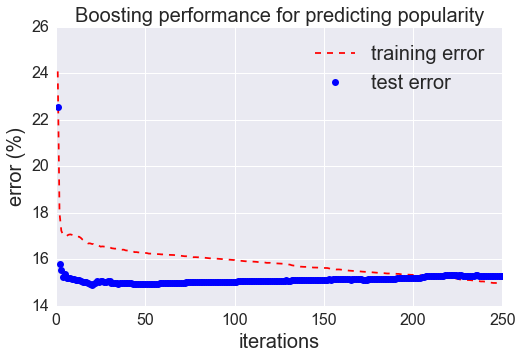

In [142]:
##################################
###### boosting classifier #######
##################################
from sklearn import ensemble

clf = ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=250)
clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
err_test = get_error(y_test, y_prediction)
print ("The test error is {0}".format(err_test))
err_boosting = err_test * 100

y_prediction = clf.predict(x_train)
err_train = get_error(y_train, y_prediction)
print ("The training error is {0}".format(err_train))
print ("Done computing error.")

# compute training and test error vs. iterations
itr = []
err_train_list = []
err_test_list = []
for i, y_pred in enumerate(clf.staged_predict(x_test)):
    itr.append(i + 1)
    err_test = get_error(y_test, y_pred)
    err_test_list.append(err_test)
print ("Done computing test errors vs. iterations")

for i, y_pred in enumerate(clf.staged_predict(x_train)):
    #itr.append(i + 1)
    err_train = get_error(y_train, y_pred)
    err_train_list.append(err_train)
print ("Done computing training errors vs. iterations")

# plot error vs. iterations
plt.figure(figsize=(8,5))
plt.plot(itr, [x * 100 for x in err_train_list], 'r--', label="training error")
plt.plot(itr, [x * 100 for x in err_test_list], 'bo', label="test error")
plt.xlabel("iterations", fontsize=20)
plt.ylabel("error (%)", fontsize=20)
plt.title("Boosting performance for predicting popularity", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=20)

# Classify for each channel
# Classify for each channel
# Classify for each channel

In [5]:
############################
# connect to sqlite
import sqlite3
conn = sqlite3.connect('youtube_project_regional_all.db') # connection
c = conn.cursor() # cursor
c_1 = conn.cursor()
c_2 = conn.cursor()
c_3 = conn.cursor()
c_4 = conn.cursor()

In [6]:
##############################################
# find all channel ids, ordered alphabatically
channel_scraped = []  # save all the channel id got selected 
for row in c.execute('SELECT DISTINCT channel_id FROM videos_makeup'):
    channel_scraped.append(row[0])
print(len(channel_scraped))
conn.close()

1221


In [101]:
########################################
### classify videos for EACH CHANNEL ###
########################################

y_label = []
categories = 2

for channel in channel_scraped:
    #print("Channel index is {0}".format(channel_scraped.index(channel)))
    y_label_each = []
    for row in c_2.execute("SELECT * FROM videos_makeup WHERE channel_id = '{0}'".format(channel)):
        y_label_each.append(row[4])
    y_label.extend(get_class(y_label_each, categories))
print("Done computing categories")
conn.close()

Done computing categories


In [8]:
############################
# connect to sqlite
import sqlite3
conn = sqlite3.connect('youtube_project_regional_all.db') # connection
c = conn.cursor() # cursor
c_1 = conn.cursor()
c_2 = conn.cursor()
c_3 = conn.cursor()
c_4 = conn.cursor()

#c.execute('ALTER TABLE videos_makeup ADD COLUMN pop_in_channel INTEGER')
#conn.commit()
#conn.close() 

In [108]:
for i in range(len(y_label)):
    pop_label = y_label[i]
    video_id = df.iloc[i, 3]
    #c_1.execute("UPDATE videos_makeup SET pop_in_channel={0} WHERE video_id='{1}'".format(pop_label, video_id))
    #conn.commit()
conn.close()
print("Done add pop_in_channel.")

Done add pop_in_channel.


In [49]:
#######################################
# classify targests into multi-labels FOR EACH CHANNEL
from numpy  import array

y_train = df_training.iloc[:, 24].values
y_test = df_test.iloc[:, 24].values

## prepare training and test set

In [ ]:
df_all = pd.concat([df.ix[:,:],df_title.ix[:,:]], axis=1)

In [28]:
# global + title length + regional + title cluster + date + token
pd.concat([df_all.ix[:,7:24],df_all.ix[:,25:325]], axis=1).iloc[:2, :30]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc,title_cluster_label,date_approx,makeup,tutorial,haul,hair,review,beauty,favorites,day,new,look,summer,get,palette
0,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [128]:
# global + title length + title cluster + date + token
pd.concat([df_all.ix[:,7:14], df_all.ix[:,22:24], df_all.ix[:,25:325]], axis=1).iloc[:2, :30]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,title_cluster_label,date_approx,makeup,tutorial,haul,hair,review,beauty,favorites,day,new,look,summer,get,palette,vlog,routine,eye,tag,fall,foundation,products,ready
0,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
# global + title length + date + token
pd.concat([df_all.ix[:,7:14], df_all.ix[:,23:24], df_all.ix[:,25:325]], axis=1).iloc[:2, :30]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,date_approx,makeup,tutorial,...,palette,vlog,routine,eye,tag,fall,foundation,products,ready,swatches
0,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [80]:
###############################################################
###### construct training set and test set ######
###### decide input and target (popular or not) features ######
###############################################################
size_data = int(1 * df_all.shape[0]) # only use 20% data base for now

# 70% data as training set, 30% as test set
size_training = int(0.7 * size_data)

# use regional features
#X = pd.concat([df_all.ix[:,7:24],df_all.ix[:,25:325]], axis=1).values
# not use regional features
X = pd.concat([df_all.ix[:,7:14], df_all.ix[:,23:24], df_all.ix[:,25:325]], axis=1).values
Y = df_all.iloc[:, 24].values
x_train = X[:size_training, :]
y_train = Y[:size_training]
x_test = X[size_training:size_data, :]
y_test = Y[size_training:size_data]

## Logistic regression
## Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

clf = LogisticRegression(penalty='l1')

clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
y_precision = precision_score(y_test, y_prediction, average='binary')
y_recall = recall_score(y_test, y_prediction, average='binary') 
y_accuracy = accuracy_score(y_test, y_prediction)
print ("The precision is {0}".format(y_precision))
print ("The recall is {0}".format(y_recall))
print ("The accuracy of test case is {0}".format(y_accuracy))


Done model learning
The precision is 0.60596153354959
The recall is 0.5974012892828364
The accuracy of test case is 0.6052300887179873


## Feature selection
## Feature selection

In [127]:
#######################
# Feature selection

from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)
x_train_new = model.transform(x_train)
x_test_new = model.transform(x_test)

In [128]:
x_train_new.shape

(185681, 14)

## Random forest
## Random forest
## Random forest

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

accuracy_list = []

#itr = range(120, 200, 10)
itr = [160]
for i in itr:
    print(i)
    clf = RandomForestClassifier(n_estimators=i)

    clf.fit(x_train, y_train)
    print ("Done model learning")

    #y_prediction = clf.predict(x_test)
    #err_test = get_error(y_test, y_prediction)
    #print ("The test error is {0}".format(err_test))
    #err_boosting = err_test * 100

    #y_prediction = clf.predict(x_train)
    #err_train = get_error(y_train, y_prediction)
    #print ("The training error is {0}".format(err_train))
    #print ("Done computing error.")

    y_prediction = clf.predict(x_test)
    y_precision = precision_score(y_test, y_prediction, average='binary')
    y_recall = recall_score(y_test, y_prediction, average='binary') 
    y_accuracy = accuracy_score(y_test, y_prediction)
    print ("The precision is {0}".format(y_precision))
    print ("The recall is {0}".format(y_recall))
    print ("The accuracy of test case is {0}".format(y_accuracy))
    accuracy_list.append(y_accuracy)
print("Done computing the effect of parameters")
min_index = accuracy_list.index(max(accuracy_list))
print("The best accuracy happens at {0} estimators, and the accuracy is {1}.".format(itr[min_index], accuracy_list[min_index]))

##########################
# save the model
#from sklearn.externals import joblib
#joblib.dump(clf, 'model_RF_160_estimators_300_tokens.pkl') 

160
Done model learning
The precision is 0.6038256160846348
The recall is 0.606516921837228
The accuracy of test case is 0.6050541606976803
Done computing the effect of parameters
The best accuracy happens at 160 estimators, and the accuracy is 0.6050541606976803.


In [149]:
x_train.shape

(185681, 309)

In [20]:
##########################
# load the model
from sklearn.externals import joblib
clf = joblib.load('model_RF_160_estimators_300_tokens_noRegional_noCluster.pkl') 

## modify image
## modify image

In [21]:
#######################################
# given an image, return the relavent features
import numpy as np
import cv2
import math

def get_image_input_features(img):
    
    ###############################################
    # global features
    ###############################################
    img_features_global = []
    
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #BGR --> HSV
    hue = img_hsv.mean(axis=(0,1))[0]/179
    sat = img_hsv.mean(axis=(0,1))[1]/255
    bri_global = img_hsv.mean(axis=(0,1))[2]/255 # value = brightness
    #print("The global hue, saturation, brightness: ({0}, {1}, {2})".format(hue, sat, bri_global))

    bri = img_hsv[:, :, 2]/255 # matrix of all pixel, normalized

    # compute Michelson contrast
    bri_max = bri.max()
    bri_min = bri.min()
    contrast_Mic = (bri_max - bri_min) / (bri_max + bri_min)
    #print("bri_max - {0}, bri_min - {1}, contrast_Mic -{2}".format(bri_max, bri_min, contrast_Mic))
    #print("The Michelson contrast of this image is {0}".format(contrast_Mic))

    # compute dynamic range
    dynamic_range = bri_max - bri_min
    #print("The dynamic range of this image is {0}".format(dynamic_range))

    # compute RMS contrast
    bri_norm = bri / bri_max # 1st, normalize the brightness matrix
    contrast_RMS = bri_norm.std(axis=(0,1))
    #print ("The RMS contrast of this image is {0}".format(contrast_RMS))
    
    img_features_global = [hue, sat, bri_global, dynamic_range, contrast_Mic, contrast_RMS]
    #return (hue, sat, bri_global, dynamic_range, contrast_Mic, contrast_RMS)
    
    '''
    ###############################################
    # regional features
    ###############################################
    img_features_regional = []
    
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    #rect = (50,50,450,290)
    rect = (10,10,450,290)
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

    mask_fr = mask2 # background: 0, foreground: 1
    mask_bc = np.ones(img.shape[:2],np.uint8) - mask_fr # background: 1, foreground: 0

    img_fr = img*mask_fr[:,:,np.newaxis]
    img_bc = img*mask_bc[:,:,np.newaxis]

    area_fr = np.count_nonzero(mask2 == 1) 
    area_bc = np.count_nonzero(mask2 == 0) 
    area_total = area_fr + area_bc

    try:
        ratio_bc_fr = area_bc / area_fr
    except ZeroDivisionError:
        print ("Opps, somthing is wrong with segmentation of the image")

    img_fr_hsv = cv2.cvtColor(img_fr, cv2.COLOR_BGR2HSV)
    bri_fr_mean = img_fr_hsv.mean(axis=(0,1))[2] * area_total / area_fr /255

    img_bc_hsv = cv2.cvtColor(img_bc, cv2.COLOR_BGR2HSV)
    bri_bc_mean = img_bc_hsv.mean(axis=(0,1))[2] * area_total / area_bc /255

    bri_diff_mean = bri_fr_mean - bri_bc_mean

    # compute standard deviation of brightness for background --> contrast for background / uniformity of background
    bri_bc = img_bc_hsv[:, :, 2] /255
    x = bri_bc - np.multiply(np.full(bri_bc.shape, bri_bc_mean), mask_bc)
    contrast_bc = math.sqrt(np.sum(np.multiply(x, x)) / area_bc)

    # compute standard deviation of brightness for foreground --> contrast for foregournd
    bri_fr = img_fr_hsv[:, :, 2] /255
    x = bri_fr - np.multiply(np.full(bri_fr.shape, bri_fr_mean), mask_fr)
    contrast_fr = math.sqrt(np.sum(np.multiply(x, x)) / area_fr)

    # contrast difference of background and foreground
    contrast_diff = contrast_fr - contrast_bc

    # compute saturation/colorfulness for background
    sat_bc = img_bc_hsv.mean(axis=(0,1))[1] * area_total / area_bc /255
    
    img_features_regional = [ratio_bc_fr, bri_fr_mean, bri_bc_mean, bri_diff_mean, contrast_bc, contrast_fr, contrast_diff, sat_bc]
    '''
    return img_features_global

In [93]:
df_all.iloc[12200, :6]

channel_id             UCHxoxKUaJpzek6NW_HOS-tg
subscriptions_count                       70787
videos_count                                117
video_id                            SD9dUhhFYEE
video_views                                 929
video_title              Peeks Cosmetics Review
Name: 12200, dtype: object

In [22]:
image_index = 12200
sample = x_train[image_index].reshape(1, -1)
prob_before = clf.predict_proba(sample)[0, 1] #probability of being popular
print(prob_before)

0.2


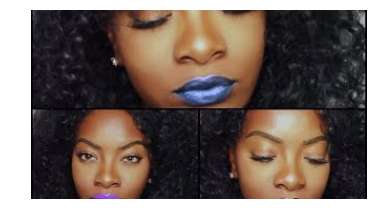

(<matplotlib.image.AxesImage at 0x11cb37128>, None)

In [94]:
##############################
# display the image
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import cv2
%matplotlib inline

image_id = df.iloc[image_index, 3]
myPath = "/Users/yaoli/02_JobApplications/03_DataScience/insight/project/youtube/thumnail_images/"
fullfilename = myPath + image_id + ".jpg"

img = cv2.imread(fullfilename)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()

In [104]:
df_all.iloc[10000, :6]

channel_id                                     UCD4otFQimoAdcF_0n3tqVzA
subscriptions_count                                                1062
videos_count                                                        108
video_id                                                    ng3b4tbl0X4
video_views                                                          52
video_title            Collective Haul Bath and Body Works And Old Navy
Name: 10000, dtype: object

In [84]:
x = x_train[100, :].tolist()

In [87]:
x = array(x).reshape(1, -1)

In [91]:
clf.predict_proba(x)

array([[ 0.2375,  0.7625]])

The popularity chance of original image is 20.0%
The chance of being popular can be improved from 20.0% to 69.375%
The color is changed by 1; the brightness is changed by 1.15; the contrast is changed by 1.25


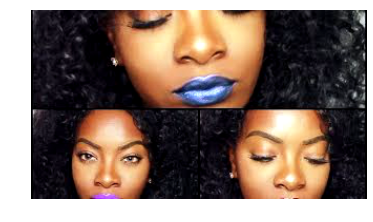

Done processing this image


In [25]:
##################################
# given an image, return a filtered one with larger popularity chance
from PIL import Image, ImageEnhance
from numpy import array

img = Image.open(fullfilename)

prob_before = clf.predict_proba(sample)[0, 1] #probability of being popular
print("The popularity chance of original image is {0}%".format(100*prob_before))

#itr = [1, 1.05, 1.1, 1.15]
itr = [1, 1.05, 1.1, 1.15, 1.2, 1.25]
#itr = [0.9, 1, 1.1, 1.2, 1.3

prob_best = prob_before
img_best = img #RGB
filter_best = []

for i in itr:
    for j in itr:
        for k in itr:
            #print([i, j, k])
            img_after = ImageEnhance.Color(img).enhance(i)
            img_after = ImageEnhance.Brightness(img_after).enhance(j)
            img_after_RGB = ImageEnhance.Contrast (img_after).enhance(k) #RGB
            img_after_arr = array(img_after_RGB)  #RGB
            
            sample_after = get_image_input_features(cv2.cvtColor(img_after_arr, cv2.COLOR_RGB2BGR))
            sample_after.extend(sample[0].tolist()[6:])
            arr = array(sample_after)
            sample_after = arr.reshape(1, -1)
            prob_after = clf.predict_proba(sample_after)[0, 1]
            #print(prob_after)
            if prob_after > prob_best:
                img_best = img_after_RGB #RGB
                prob_best = prob_after
                filter_best = [i, j, k]
if prob_best == prob_before:
    print("The popularity chance is {0}%. It's already very high!".format(100*prob_best))
else:
    print("The chance of being popular can be improved from {0}% to {1}%".format(100*prob_before, 100*prob_best))      
    print("The color is changed by {0}; the brightness is changed by {1}; the contrast is changed by {2}".format(filter_best[0], filter_best[1], filter_best[2]))
    plt.axis("off")
    plt.imshow(img_best),plt.show()
print("Done processing this image")      

In [163]:
importance = clf.feature_importances_

# compute std 
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
x = pd.concat([df_all.ix[:,7:14], df_all.ix[:,23:24], df_all.ix[:,25:325]], axis=1)
feature_list = x.columns.values

In [182]:
max_features = 13
max_index = importance.argsort()[-max_features:][::-1].tolist()
max_importance = [importance[i] for i in max_index]
max_std = [std[i] for i in max_index]
max_feature_list = [feature_list[i] for i in max_index]

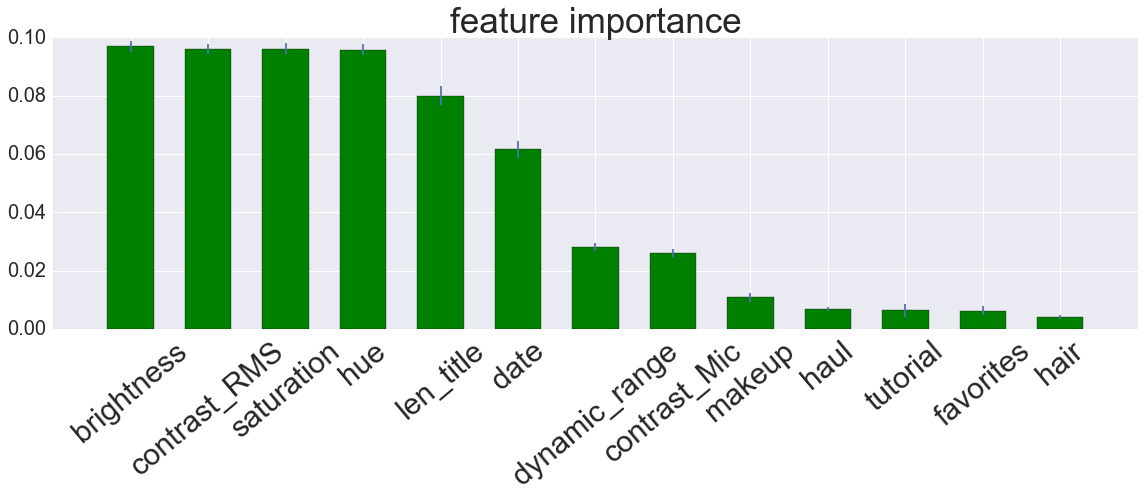

In [197]:
import seaborn as sns
from numpy  import array

fig = plt.figure(figsize=(16,7))
#sns.barplot(feature_list[1:], importance[1:])
ind = [i * 2.5 for i in range(1, max_features + 1)]
plt.bar(ind, max_importance, yerr=max_std, color="r", width=1.5, align="center")
plt.xticks(rotation=40)
plt.xticks(fontsize=30)
plt.xticks(ind, max_feature_list)
plt.yticks(fontsize=20)
#plt.set_xticks(range(1, max_features + 1) + 0.5)
#plt.xlabel("")
plt.title("feature importance", fontsize=35)
plt.tight_layout()
fig.savefig('fig_RF_feature_importance.pdf')

In [184]:
max_feature_list[0] = "brightness"

In [185]:
max_feature_list[5] = "date"

In [332]:
x = df_all.iloc[264722:, 4].tolist()

In [342]:
x_zoom = [i for i in x if i < 200]

In [341]:
import statistics
statistics.median(x)

89

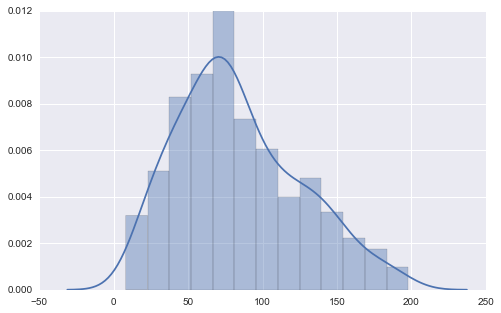

In [343]:
fig = plt.figure(figsize=(8,5))

sns.distplot(x_zoom)

## Boosting
## Boosting
## Boosting

Done model learning
The precision is 0.5962229265715795
The recall is 0.5684176067687349
Done computing precision and recall for test set


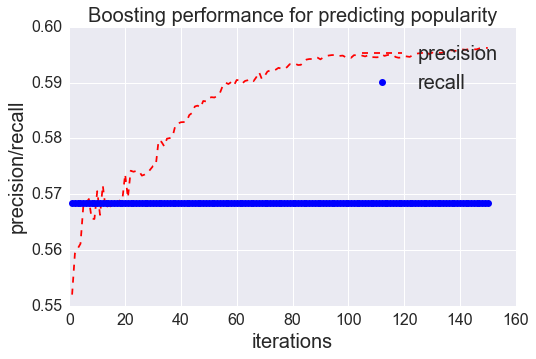

In [105]:
##################################
###### boosting classifier #######
##################################
from sklearn import ensemble

clf = ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=300)
clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
y_precision = precision_score(y_test, y_prediction, average='binary')
y_recall = recall_score(y_test, y_prediction, average='binary') 
print ("The precision is {0}".format(y_precision))
print ("The recall is {0}".format(y_recall))

# compute training and test error vs. iterations
itr = []
precision_list = []
recall_list = []

for i, y_pred in enumerate(clf.staged_predict(x_test)):
    itr.append(i + 1)
    y_precision = precision_score(y_test, y_pred, average='binary')
    y_recall = recall_score(y_test, y_prediction, average='binary') 
    precision_list.append(y_precision)
    recall_list.append(y_recall)
print ("Done computing precision and recall for test set")

# plot error vs. iterations
plt.figure(figsize=(8,5))
plt.plot(itr, [x for x in precision_list], 'r--', label="precision")
plt.plot(itr, [x for x in recall_list], 'bo', label="recall")
plt.xlabel("iterations", fontsize=20)
plt.ylabel("precision/recall", fontsize=20)
plt.title("Boosting performance for predicting popularity", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=20)

Done model learning
The test error is 0.4074744276056197
Done computing error.
Done computing test errors vs. iterations


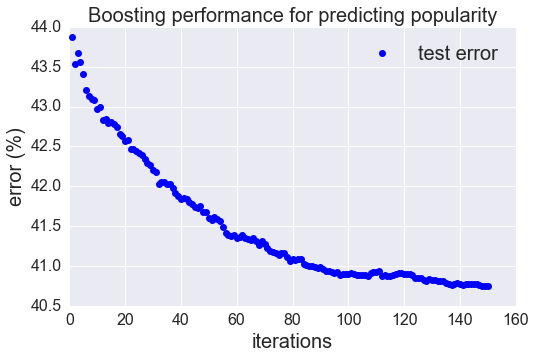

In [104]:
##################################
###### boosting classifier #######
##################################
from sklearn import ensemble

clf = ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=150)
clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
err_test = get_error(y_test, y_prediction)
print ("The test error is {0}".format(err_test))
err_boosting = err_test * 100

y_prediction = clf.predict(x_train)
err_train = get_error(y_train, y_prediction)
print ("The training error is {0}".format(err_train))
print ("Done computing error.")

# compute training and test error vs. iterations
itr = []
err_train_list = []
err_test_list = []
for i, y_pred in enumerate(clf.staged_predict(x_test)):
    itr.append(i + 1)
    err_test = get_error(y_test, y_pred)
    err_test_list.append(err_test)
print ("Done computing test errors vs. iterations")

for i, y_pred in enumerate(clf.staged_predict(x_train)):
    itr.append(i + 1)
    err_train = get_error(y_train, y_pred)
    err_train_list.append(err_train)
print ("Done computing training errors vs. iterations")

# plot error vs. iterations
plt.figure(figsize=(8,5))
plt.plot(itr, [x * 100 for x in err_train_list], 'r--', label="training error")
plt.plot(itr, [x * 100 for x in err_test_list], 'bo', label="test error")
plt.xlabel("iterations", fontsize=20)
plt.ylabel("error (%)", fontsize=20)
plt.title("Boosting performance for predicting popularity", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=20)

## extract features from title (using token list)
## extract features from title (using token list)
## extract features from title (using token list)

In [3]:
df.head(2)

,channel_id,subscriptions_count,videos_count,video_id,video_views,video_title,video_date,hue,saturation,brightness_global,...,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc
0,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,39aKSTw1HfY,37755,Glitter Eye Makeup Look - Isabella Fiori,11 hours ago,0.376588,0.144493,0.591732,...,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281
1,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,7MzCD3hScOY,166407,DRUGSTORE BACK TO SCHOOL MAKEUP TUTORIAL,3 days ago,0.517865,0.138269,0.819456,...,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836


In [9]:
#############################
# import all titles into a list
############################
# connect to sqlite

title_text = ""

for channel in channel_scraped:
    #print("Channel index is {0}".format(channel_scraped.index(channel)))
    for row in c_2.execute("SELECT * FROM videos_makeup WHERE channel_id = '{0}'".format(channel)):
        #print(row[5])
        title_text = title_text + " "
        title_text = title_text + row[5]
    #y_label.extend(get_class(y_label_each, categories))
print("Done importing titles")


Done importing titles


In [10]:
title_text[:200]

' Glitter Eye Makeup Look - Isabella Fiori DRUGSTORE BACK TO SCHOOL MAKEUP TUTORIAL Grunge Cranberry Smokey Eye HOW I DID MY MAKEUP IN HIGH SCHOOL! 100 LAYERS OF SHIRTS GRWM: Travel Edition! My 10 Minu'

In [11]:
#########################################
# create a token list based on frequency

import sys
import nltk
import codecs
from nltk.corpus import stopwords

# tokenize
words = nltk.word_tokenize(title_text)
# remove punctuation & change to all lowercase
words = [w.lower() for w in words if w.isalpha()]

# Remove single-character tokens (mostly punctuation)
words = [word for word in words if len(word) > 1]

# Remove numbers
words = [word for word in words if not word.isnumeric()]

# NLTK's default Engish stopwords
default_stopwords = nltk.corpus.stopwords.words('english')
# Remove stopwords
words = [word for word in words if word not in default_stopwords]

# Calculate frequency distribution
fdist = nltk.FreqDist(words)

# Output top 1000 words

common_words = []
for word, frequency in fdist.most_common(1000):
    #print(u'{};{}'.format(word, frequency))
    common_words.append(word)
print("Done creating token list for titles.")

Done creating token list for titles.


In [74]:
import pickle

with open("title_token_list", 'wb') as f:
    pickle.dump(common_words, f)

In [75]:
import pickle

with open("title_token_list", 'rb') as f:
    my_list = pickle.load(f)

In [13]:
###########################################
# create indicator vector for each video title
title_indicator = []

for channel in channel_scraped:
    #print("Channel index is {0}".format(channel_scraped.index(channel)))
    for row in c_3.execute("SELECT * FROM videos_makeup WHERE channel_id = '{0}'".format(channel)):
        title = nltk.word_tokenize(row[5])
        title = [w.lower() for w in title if w.isalpha()] # the indicator vector for this title
        title_indicator.append([int(x in title) for x in common_words])
print("Done converting titles")

df_title=pd.DataFrame(title_indicator,columns=common_words)

Done converting titles


In [14]:
df_title.iloc[:2, :20]

,makeup,tutorial,haul,hair,review,beauty,favorites,day,new,look,summer,get,palette,vlog,routine,eye,tag,fall,foundation,products
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## PCA of title
## PCA of title

In [15]:
df_all = pd.concat([df.ix[:,:],df_title.ix[:,:]], axis=1)

In [17]:
df_all.iloc[:2, 7:26]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc,title_cluster_label,date_approx,pop_in_channel,makeup
0,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281,1,0,1,1
1,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836,3,0,2,1


In [16]:
X = df_title.iloc[:, :].values
#X = pd.concat([df.ix[:, 7:13], df.ix[:, 14:22]], axis=1).values
#X = pd.concat([df_training.ix[:,7:14],df_training.ix[:,22:]], axis=1).values

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

X_norm = normalize(X, norm='l2')
X_reduced = PCA(n_components=3).fit_transform(X_norm)

/Users/yaoli/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


In [20]:
X_reduced.shape

(265259, 3)

NameError: name 'y_label' is not defined

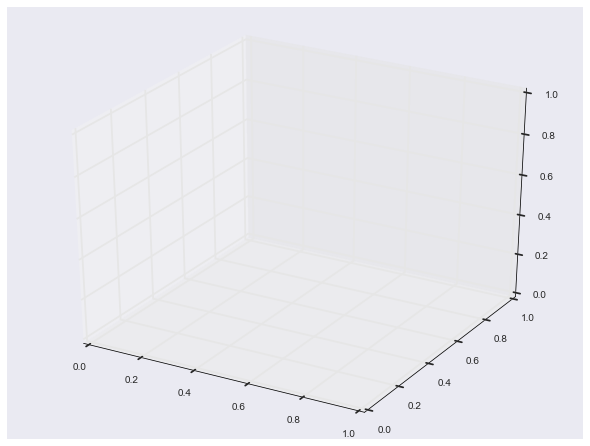

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_label, cmap=plt.cm.Paired)
#plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_label)
ax.set_title("PCA of keywords in title")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
#fig.savefig('fig_PCA_of_title.pdf')

## clustering based on title
## clustering based on title

In [22]:
X_reduced.shape

(265259, 3)

In [23]:
reduced_data = X_reduced[:]

Done clustering.


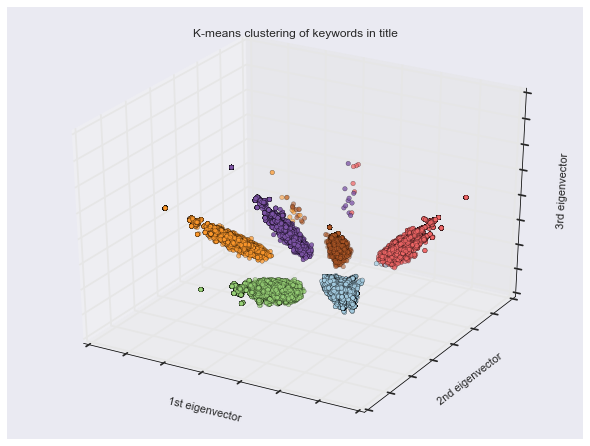

In [24]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

y_clustering_lable = KMeans(n_clusters=6, init='k-means++', n_init=10).fit_predict(reduced_data)
print("Done clustering.")
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=y_clustering_lable, cmap=plt.cm.Paired)
#plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_clustering_lable)
ax.set_title("K-means clustering of keywords in title")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
#fig.savefig('fig_kmeans_clustering_of_title.pdf')
df_clustering=pd.DataFrame(y_clustering_lable,columns=['clustering label'])

In [49]:
############################
# connect to sqlite
import sqlite3
conn = sqlite3.connect('youtube_project_regional_all.db') # connection
c = conn.cursor() # cursor
c_1 = conn.cursor()
c_2 = conn.cursor()
c_3 = conn.cursor()
c_4 = conn.cursor()

#c.execute('ALTER TABLE videos_makeup ADD COLUMN title_cluster_label INTEGER')
#conn.commit()
    

In [36]:
cluster_label = y_clustering_lable.tolist()

In [50]:
for i in range(len(cluster_label)):
    label = cluster_label[i]
    video_id = df.iloc[i, 3]
    #c_1.execute("UPDATE videos_makeup SET title_cluster_label={0} WHERE video_id='{1}'".format(label, video_id))
    conn.commit()
conn.close()
print("Done add clustering labels")


Done add clustering labels


## PCA and clustering of images, date
## PCA and clustering of images, date

In [319]:
y.shape

(112, 14)

In [321]:
y = pd.concat([df_all.ix[197:308,7:13],df_all.ix[197:308,14:22]], axis=1).values

In [323]:
y = df_all.iloc[197:308, 7:13].values

In [324]:
y.shape

(111, 6)

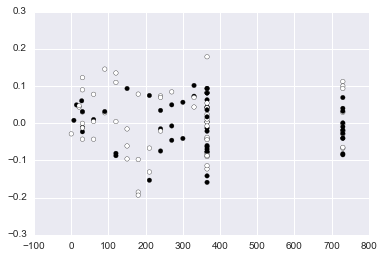

In [320]:
y = df_all.iloc[197:308, 7:13].values
#y = pd.concat([df_all.ix[197:308,7:13],df_all.ix[197:308,14:22]], axis=1).values
y_norm = normalize(y, norm='l2')
y_reduced = PCA(n_components=1).fit_transform(y_norm)
x = df_all.iloc[197:308, 22].tolist()
y_pop = y_label[197:308]
#plt.plot(x, y_reduced, c= 'ro')
plt.scatter(x, y_reduced, c=y_pop)

In [326]:
df_all.iloc[308:310, :23]

,channel_id,subscriptions_count,videos_count,video_id,video_views,video_title,video_date,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc,date
308,UCXMO7JjiR6NXc2YC95wAH9Q,12360,98,ZLt_QMN1J7c,1157,Dramatic Summer Night Makeup Tutorial 2016,3 months ago,0.269320,0.266140,0.418821,1.0,1.0,0.286996,42,0.670437,0.537738,0.241448,0.296291,0.194557,0.277447,0.082890,0.266113,90
309,UCXMO7JjiR6NXc2YC95wAH9Q,12360,98,KeeGNKF6QtQ,1803,Night Out Outfit Ideas | Lookbook 2016,3 months ago,0.494057,0.395133,0.599967,1.0,1.0,0.253474,39,0.540025,0.610379,0.580688,0.029691,0.196469,0.278910,0.082441,0.379859,90


In [277]:
X = pd.concat([df_all.ix[:,7:13],df_all.ix[:,14:23]], axis=1).values

from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

X_norm = normalize(X, norm='l2')
X_reduced = PCA(n_components=2).fit_transform(X_norm)

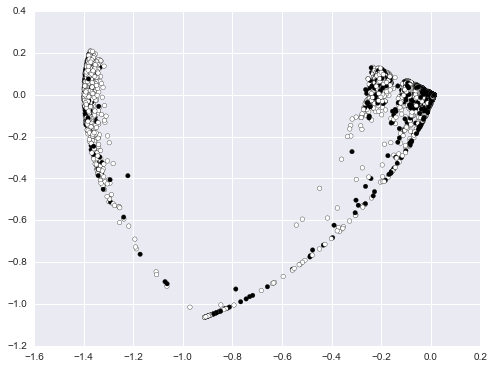

In [278]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
#ax = Axes3D(fig)
#ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_label, cmap=plt.cm.Paired)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_label)

Done clustering.


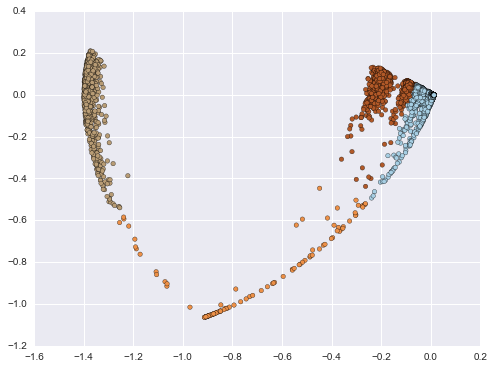

In [284]:
from sklearn.cluster import KMeans
y_clustering_lable = KMeans(n_clusters=4, init='k-means++', n_init=10).fit_predict(X_reduced)
print("Done clustering.")
fig = plt.figure(1, figsize=(8, 6))
#ax = Axes3D(fig)
#ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=y_clustering_lable, cmap=plt.cm.Paired)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_clustering_lable, cmap=plt.cm.Paired)

## global featues, regional features, title length, k-clustering, title keywords
## global featues, regional features, title length, k-clustering, title keywords
## global featues, regional features, title length, k-clustering, title keywords

In [124]:
df_all.iloc[:2, ]

,channel_id,subscriptions_count,videos_count,video_id,video_views,video_title,video_date,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc,clustering label,makeup,tutorial,haul,hair,review,beauty,favorites,day,new,look,summer,get,palette,vlog,routine,eye,tag,fall,foundation,products,ready,swatches,first,inspired,smokey,giveaway,eyes,lip,diy,unboxing,skin,drugstore,spring,mac,collection,natural,school,easy,grwm,update,face,sephora,part,demo,fashion,holiday,cosmetics,bag,lips,christmas,back,halloween,nail,outfit,everyday,night,collab,top,glam,box,lipstick,best,make,july,huge,tips,challenge,full,favorite,skincare,empties,color,eyeshadow,using,urban,ootd,life,pink,style,quick,edition,june,may,black,winter,body,matte,de,closed,purple,march,april,week,video,maybelline,time,favourites,ipsy,red,decay,care,august,lipsticks,nyx,impression,impressions,wig,brown,glitter,love,ulta,blue,mini,february,january,faced,birthday,girl,lookbook,ideas,gold,tour,brushes,october,room,chat,simple,naked,clothing,try,art,perfect,november,pro,party,september,brush,liquid,dark,talk,valentine,high,collective,green,contour,got,big,vlogmas,mascara,target,year,series,cream,pop,cut,youtube,vs,product,one,nails,soft,la,current,curly,feat,morning,polish,updated,free,lace,home,kit,forever,healthy,go,outfits,prom,eyeliner,friday,liner,travel,chit,rose,date,shopping,ft,essentials,baby,pan,acne,colourpop,nude,elf,wet,curls,lorac,secret,wild,project,minute,affordable,plus,bath,birchbox,used,neutral,work,valentines,december,set,weekly,anastasia,sale,tree,dollar,nars,rimmel,story,winner,years,tarte,sexy,gift,things,extensions,lashes,bold,...,mirror,stash,skull,semi,neon,shampoo,inglot,limited,rid,essence,champagne,ud,bella,couture,wavy,amazing,celebrity,hits,lifestyle,lime,youtuber,mature,comparison,snacks,marie,faux,anniversary,friendly,start,surprise,grow,company,shea,club,men,match,navy,glamorous,items,yellow,katy,orchid,rock,want,michael,sally,shade,pencil,ice,really,misses,pictures,hollywood,polishes,wigs,concert,everything,tv,jonathancurtisonyt,ponytail,news,olive,lauder,evening,opi,vampire,obsessions,results,pack,shower,glamour,ohhitsonlyalice,nordstrom,ootn,grail,medium,erin,topshop,mary,makingupashlee,opening,interview,burgundy,grocery,uk,mercier,goddess,sample,repurchase,born,barbie,massive,filming,highlighter,worst,check,alex,nudes,estee,ultimate,ttsandra,drag,bronzed,bean,install,maquillage,toxic,closure,battle,soap,itslinamar,bob,voluminous,hand,rawbeautykristi,dewy,entry,emmasrectangle,highlighting,del,glittery,create,formula,perry,crochet,bronzer,clip,months,elle,fill,jessica,casey,retro,haircare,hard,danger,finale,wengie,sweater,lazy,el,conditioner,hollysamanthaa,tone,holmes,trailer,kitchen,candle,serum,open,tools,remove,jeffree,fab,lasting,tutorials,natasha,violet,heatless,boy,much,henna,scrub,grunge,fails,today,melsoldera,pin,brandy,gorgeous,drug,secrets,irresistible,health,moen,kinky,julep,memebox,mother,blender,weather,spray,jamiepaigebeauty,glasses,megan,finds,personal,mannymua,photos,nicki,cushion,spotlight,snow,san,wednesday,veda,clay,lots,bye,eyelashes,growth,loc,lange,reveal,taste,tumblr,totaldivarea,head,fat,line,chloé,bangs,basic,eman,removal,im,rosaliesaysrawr,tattoos,keep,round,curlykimmystar,cleaning,loving,trinaduhra,backpack,festive,ruby,thru,crime,sparkle,beginner,different,justenufeyes,inspiration,see,favoritos,saturday,swift,misstiffanykaee,waterproof,season,naturally,condren,apartment,peruvian,coconut,magazine,pham,concealers,diet
0,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,39aKSTw1HfY,37755,Glitter Eye Makeup Look - Isabella Fiori,11 hours ago,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [48]:
#cluster_1 = df_all.loc[:, df.loc['clustering label'] == 1]
cluster_0 = df_all.loc[df_all['clustering label'] == 0]
cluster_1 = df_all.loc[df_all['clustering label'] == 1]
cluster_2 = df_all.loc[df_all['clustering label'] == 2]
cluster_3 = df_all.loc[df_all['clustering label'] == 3]
cluster_4 = df_all.loc[df_all['clustering label'] == 4]
cluster_5 = df_all.loc[df_all['clustering label'] == 5]

In [49]:
cluster_2.shape[0]/df_all.shape[0]

0.10115396650066538

In [50]:
df_all.shape

(265259, 1024)

## predict for each cluster
## predict for each cluster
## predict for each cluster

In [80]:
cluster_2.iloc[:2, 22]

0    0
3    7
Name: date, dtype: int64

In [85]:
cluster_2.iloc[:2, 7:23]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc,date
0,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.58095,0.013615,0.250725,0.263452,0.012727,0.101281,0
3,0.411592,0.144167,0.617192,0.968627,1.000000,0.217338,35,1.014127,0.603462,0.63073,-0.027268,0.163748,0.248388,0.084640,0.068869,7


In [160]:
cluster_3.shape[0]/df_all.shape[0]

0.07865520114303379

In [101]:
x = pd.concat([df_training.iloc[:,1],df_training.iloc[:,7:23]], axis=1)
list(x.columns.values)

['subscriptions_count',
 'hue',
 'saturation',
 'brightness_global',
 'dynamic_range',
 'contrast_Mic',
 'contrast_RMS',
 'len_title',
 'ratio_bc_fr',
 'bri_fr_mean',
 'bri_bc_mean',
 'bri_diff_mean',
 'contrast_bc',
 'contrast_fr',
 'contrast_diff',
 'sat_bc',
 'date']

In [161]:
###############################################################
###### construct training set and test set ######
###### decide input and target (popular or not) features ######
###############################################################
cluster = cluster_3
size_data = int(1 * cluster.shape[0]) # only use 20% data base for now

# 70% data as training set, 30% as test set

size_training = int(0.7 * size_data)

df_training = cluster.iloc[:size_training, :]
df_test = cluster.iloc[size_training:size_data, :]

# select input features: day vs. night, season, longevity, sillage, notes, accords
# select target feature: whether a perfume is popular or not
#x_train = df_training.iloc[:, 7:14].values
x_train = pd.concat([df_training.iloc[:,1],df_training.iloc[:,7:23]], axis=1).values
#x_train = pd.concat([df_training.iloc[:,1],df_training.iloc[:,7:14], df_training.iloc[:,22]], axis=1).values
#x_train = df_training.iloc[:, 1].values
#x_train = x_train[:, np.newaxis]

#x_test = df_test.iloc[:, 7:14].values
x_test = pd.concat([df_test.iloc[:,1],df_test.iloc[:,7:23]], axis=1).values
#x_test = pd.concat([df_test.iloc[:,1],df_test.iloc[:,7:14], df_test.iloc[:,22]], axis=1).values
#x_test = df_test.iloc[:, 1].values
#x_test = x_test[:, np.newaxis]

In [162]:
#######################################
# classify targests into multi-labels
from numpy import array

y = cluster.iloc[:,4].values.tolist()
y_label_all = get_class(y, 3)

y_train = array(y_label_all[:size_training])

y_test = array(y_label_all[size_training:size_data])

In [56]:
y_train[:5]

array([3, 3, 3, 3, 3])

100
Done model learning
The test error is 0.31549520766773165
110
Done model learning
The test error is 0.31693290734824286
120
Done model learning
The test error is 0.3143769968051118
130
Done model learning
The test error is 0.31469648562300323
140
Done model learning
The test error is 0.31421725239616616
150
Done model learning
The test error is 0.3130990415335463
160
Done model learning
The test error is 0.3143769968051118
170
Done model learning
The test error is 0.3084664536741214
180
Done model learning
The test error is 0.3084664536741214
190
Done model learning
The test error is 0.3145367412140575
200
Done model learning
The test error is 0.3119808306709265


0.3084664536741214

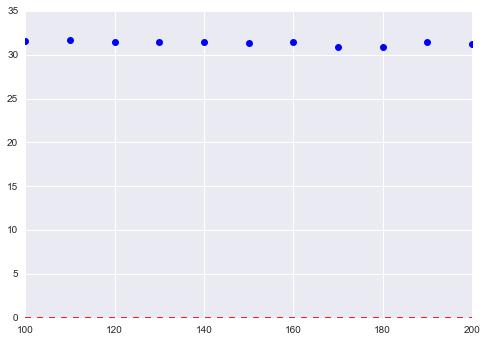

In [163]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

err_test_list = []
err_train_list = []
itr = range(100, 210, 10)

for i in itr:
    print(i)

    clf = RandomForestClassifier(n_estimators=i)

    clf.fit(x_train, y_train)
    print ("Done model learning")

    y_prediction = clf.predict(x_test)
    err_test = get_error(y_test, y_prediction)
    err_test_list.append(err_test)
    print ("The test error is {0}".format(err_test))

    y_prediction = clf.predict(x_train)
    err_train = get_error(y_train, y_prediction)
    err_train_list.append(err_train)
    #print ("The training error is {0}".format(err_train))
    #print ("Done computing error.")
plt.plot(itr, [x * 100 for x in err_train_list], 'r--', label="training error")
plt.plot(itr, [x * 100 for x in err_test_list], 'bo', label="test error")
min(err_test_list)

In [164]:
clf = RandomForestClassifier(n_estimators=180)

clf.fit(x_train, y_train)
print ("Done model learning")

Done model learning


In [165]:
# compute std 
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

In [166]:
importance = clf.feature_importances_
#importance = importance.tolist()
importance.shape

(17,)

In [158]:
x = pd.concat([df_training.iloc[:,1],df_training.iloc[:,7:23]], axis=1)
feature_list = x.columns.values.tolist()

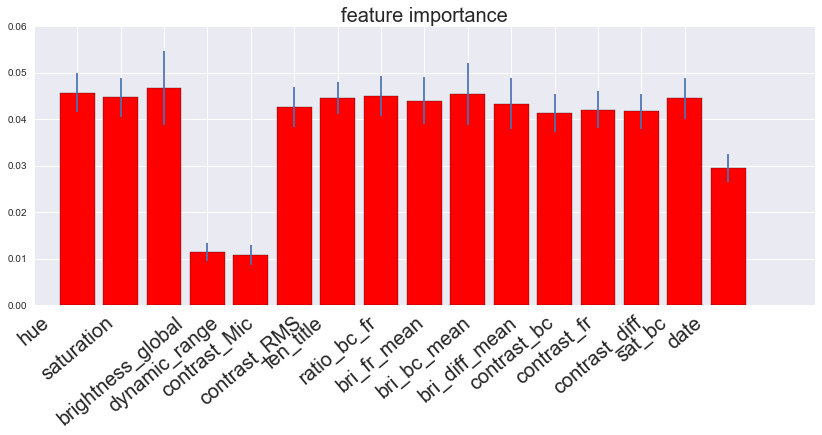

In [167]:
import seaborn as sns
from numpy  import array

fig = plt.figure(figsize=(14,5))
#sns.barplot(feature_list[1:], importance[1:])
plt.bar(range(1, 17), importance[1:], yerr=std[1:], color="r", align="center")
plt.xticks(rotation=40)
plt.xticks(fontsize=20)
plt.xticks(range(16), feature_list[1:])
#plt.xlabel("")
plt.title("feature importance", fontsize=20)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

clf = LogisticRegression(penalty='l1')

clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
err_test = get_error(y_test, y_prediction)
print ("The test error is {0}".format(err_test))
err_boosting = err_test * 100

y_prediction = clf.predict(x_train)
err_train = get_error(y_train, y_prediction)
print ("The training error is {0}".format(err_train))
print ("Done computing error.")

Done model learning
The test error is 0.2875776397515528
The training error is 0.31844319028857415
Done computing error.


## predict for all clusters, using cluster number & date
## predict for all clusters, using cluster number & date
## predict for all clusters, using cluster number & date

In [70]:
df.iloc[:2, 7:]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc,title_cluster_label,date_approx
0,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281,1,0
1,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836,3,0


In [71]:
df.ix[:2, 7:]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc,title_cluster_label,date_approx
0,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,0.262881,0.594566,0.580950,0.013615,0.250725,0.263452,0.012727,0.101281,1,0
1,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,1.759281,0.636601,0.923394,-0.286793,0.054915,0.252402,0.197487,0.087836,3,0
2,0.397870,0.194863,0.600100,0.984314,0.969112,0.186909,27,0.604055,0.597575,0.604280,-0.006705,0.170278,0.196231,0.025953,0.124208,0,0


In [85]:
###############################################################
###### construct training set and test set ######
###### decide input and target (popular or not) features ######
###############################################################
size_data = int(0.1 * df.shape[0]) # only use 20% data base for now

# 70% data as training set, 30% as test set

size_training = int(0.7 * size_data)

df_training = df.iloc[:size_training, :]
df_test = df.iloc[size_training:size_data, :]

# select input features: day vs. night, season, longevity, sillage, notes, accords
# select target feature: whether a perfume is popular or not
#x_train = df_training.iloc[:, 7:14].values
#x_train = pd.concat([df_training.ix[:,7:14],df_training.ix[:,22:]], axis=1).values
x_train = pd.concat([df_training.ix[:,1],df_training.ix[:,7:]], axis=1).values
#x_train = df_training.iloc[:, 1].values
#x_train = x_train[:, np.newaxis]

#x_test = df_test.iloc[:, 7:14].values
#x_test = pd.concat([df_test.ix[:,7:14],df_test.ix[:,22:]], axis=1).values
x_test = pd.concat([df_test.ix[:,1],df_test.ix[:,7:]], axis=1).values
#x_test = df_test.iloc[:, 1].values
#x_test = x_test[:, np.newaxis]

In [86]:
#######################################
# classify targests into multi-labels
from numpy import array

y = df.iloc[:,4].values.tolist()
y_label_all = get_class(y, 3)

y_train = array(y_label_all[:size_training])

y_test = array(y_label_all[size_training:size_data])

In [90]:
#############################
###### SVM classifier #######
#############################
from sklearn.svm import SVC

# compute test/training error vs. gamma --> overfit or underfit

gamma_list = np.logspace(-10, -4, 10).tolist()
err_train_list = []
err_test_list = []
for x in gamma_list:
    print("************************************")
    print(gamma_list.index(x))
    print("gamma is {0}".format(x))
    clf = SVC(gamma=x)
    clf.fit(x_train, y_train)
    print ("Done model learning")

    y_prediction = clf.predict(x_test)
    err_test = get_error(y_test, y_prediction)
    err_test_list.append(err_test)
    print ("The test error is {0}".format(err_test))
    
    y_prediction = clf.predict(x_train)
    err_train = get_error(y_train, y_prediction)
    err_train_list.append(err_train)
    print ("The train error is {0}".format(err_train))
print("Done computing training/test errors vs. gamma")
err_svm = min(err_test_list) * 100

************************************
0
gamma is 1e-10
Done model learning
The test error is 0.338150289017341
The train error is 0.31146658049227127
************************************
1
gamma is 4.6415888336127727e-10
Done model learning
The test error is 0.3321186227695401
The train error is 0.3121667474551624
************************************
2
gamma is 2.1544346900318866e-09
Done model learning
The test error is 0.3372706710228701
The train error is 0.3111434265093984
************************************
3
gamma is 1e-08
Done model learning
The test error is 0.3617743151545615
The train error is 0.30489578284052354
************************************
4
gamma is 4.641588833612773e-08
Done model learning
The test error is 0.36152299572756974
The train error is 0.3043033338719233
************************************
5
gamma is 2.1544346900318822e-07
Done model learning
The test error is 0.3443076149786378
The train error is 0.30112565304034034
************************************

In [91]:
err_svm

33.21186227695401

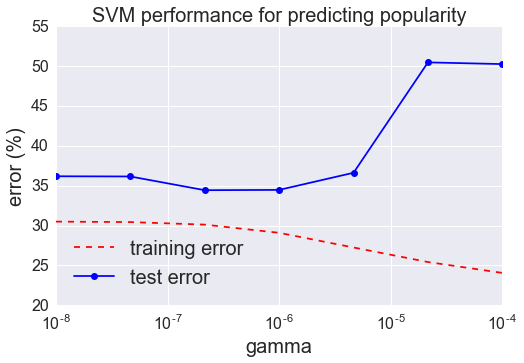

In [92]:
import matplotlib.pyplot as plt

# plot error vs. gamma (gamma too small: underfit; too large: overfit)
plt.figure(figsize=(8,5))
plt.semilogx(gamma_list[3:], [x * 100 for x in err_train_list[3:]], 'r--', label="training error")
plt.semilogx(gamma_list[3:], [x * 100 for x in err_test_list[3:]], 'bo-', label="test error")
plt.xlabel("gamma", fontsize=20)
plt.ylabel("error (%)", fontsize=20)
plt.title("SVM performance for predicting popularity", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='lower left', fontsize=20)

In [ ]:
##################################
###### boosting classifier #######
##################################
from sklearn import ensemble

clf = ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=200)
clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
err_test = get_error(y_test, y_prediction)
print ("The test error is {0}".format(err_test))
err_boosting = err_test * 100

y_prediction = clf.predict(x_train)
err_train = get_error(y_train, y_prediction)
print ("The training error is {0}".format(err_train))
print ("Done computing error.")

# compute training and test error vs. iterations
itr = []
err_train_list = []
err_test_list = []
for i, y_pred in enumerate(clf.staged_predict(x_test)):
    itr.append(i + 1)
    err_test = get_error(y_test, y_pred)
    err_test_list.append(err_test)
print ("Done computing test errors vs. iterations")

for i, y_pred in enumerate(clf.staged_predict(x_train)):
    itr.append(i + 1)
    err_train = get_error(y_train, y_pred)
    err_train_list.append(err_train)
print ("Done computing training errors vs. iterations")

# plot error vs. iterations
plt.figure(figsize=(8,5))
plt.plot(itr, [x * 100 for x in err_train_list], 'r--', label="training error")
plt.plot(itr, [x * 100 for x in err_test_list], 'bo', label="test error")
plt.xlabel("iterations", fontsize=20)
plt.ylabel("error (%)", fontsize=20)
plt.title("Boosting performance for predicting popularity", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=20)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

clf = LogisticRegression(penalty='l1')

clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
err_test = get_error(y_test, y_prediction)
print ("The test error is {0}".format(err_test))
err_boosting = err_test * 100

y_prediction = clf.predict(x_train)
err_train = get_error(y_train, y_prediction)
print ("The training error is {0}".format(err_train))
print ("Done computing error.")

Done model learning
The test error is 0.3201512980974641
The training error is 0.3521738896279102
Done computing error.


## extract date/time
## extract date/time

In [199]:
date_list = df_all.iloc[:200, 6].tolist()

In [53]:
##################################################
# define a function to convert time string to date
import re

def get_date(time_string):
    x_num = int(re.findall(r'\d+', time_string)[0])
    if 'year' in time_string:
        date = x_num * 365
    elif 'month' in time_string:
        date = x_num * 30
    elif 'week' in time_string:
        date = x_num * 7
    else:
        date = 0
    return date
        
    

In [55]:
date_approx = []
date_list = df.iloc[:, 6].tolist()
for x in date_list:
    date = get_date(x)
    date_approx.append(date)
print("Done computing date!")

Done computing date!


In [62]:
############################
# connect to sqlite
import sqlite3
conn = sqlite3.connect('youtube_project_regional_all.db') # connection
c = conn.cursor() # cursor
c_1 = conn.cursor()
c_2 = conn.cursor()
c_3 = conn.cursor()
c_4 = conn.cursor()

#c.execute('ALTER TABLE videos_makeup ADD COLUMN date_approx INTEGER')
#conn.commit()
#conn.close()    

In [63]:
for i in range(len(date_approx)):
    date = date_approx[i]
    video_id = df.iloc[i, 3]
    c_1.execute("UPDATE videos_makeup SET date_approx={0} WHERE video_id='{1}'".format(date, video_id))
    conn.commit()
conn.close()
print("Done add dates.")

Done add dates.


## compare good performance channels with bad

In [38]:
channel_scraped[401]

'UCQXjEGVWQYEj4lA2GsvCOaQ'

In [50]:
x_bad = df_all.loc[df_all['channel_id'] == channel_scraped[401]]
x_bad = x_bad.iloc[:, 7:13]

In [51]:
x_bad.iloc[:2, :]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS
48943,0.211478,0.218791,0.531096,0.992157,0.984436,0.245791
48944,0.488699,0.459550,0.696472,0.996078,0.992188,0.249686


In [39]:
channel_scraped[443]

'UCNGr_3LSXp3KL55jZW7Pvhg'

In [52]:
x_good = df_all.loc[df_all['channel_id'] == channel_scraped[443]]
x_good = x_good.iloc[:, 7:13]

In [55]:
x_compare = x_bad.append(x_good)

In [57]:
x_compare.shape[0]

296

In [58]:
x_label = []
for i in range(x_compare.shape[0]):
    if i < 136:
        x_label.append(0) # bad
    else:
        x_label.append(1)


In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
X = x_compare.values
X_norm = normalize(X, norm='l2')
X_reduced = PCA(n_components=2).fit_transform(X_norm)

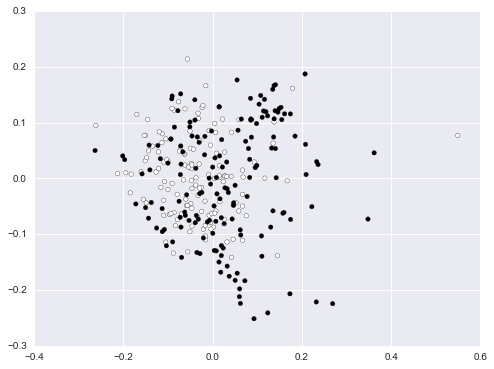

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
#ax = Axes3D(fig)
#ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_label, cmap=plt.cm.Paired)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=x_label)